# Flujo en una cavidad con Navier-Stokes


Aquí está el sistema de ecuaciones diferenciales: dos ecuaciones para las componentes  $u,v$ de la velocidad  y una ecuación para la presión:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

### Ecuaciones discretizadas

En primer lugar, vamos a discretizar la ecuacion del momento-$u$, de la siguiente manera:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\ 
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

De forma similar para la ecuación del momento-$v$:

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

Por último, la ecuación de la presión de Poisson-discretizado se puede escribir así:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

Al igual que antes, reorganicemos las ecuaciones en la forma en que las iteraciones tienen que proceder en el código. En primer lugar, las ecuaciones de movimiento para la velocidad en el próximo paso de tiempo.

La ecuación del momento en la dirección $u$:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

la ecuación del momento en la dirección $u$:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

Reorganizamos la ecuación de presión-Poisson.

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

La condición incial es $u, v, p = 0$ en todos los puntos, y las condiciones de contorno son:

$u=2$ en $y=4$ (la "tapa" en movimiento);

$u, v=0$ en las otras fronteras;

$\frac{\partial p}{\partial y}=0$ en $y=0$;

$p=0$ en $y=4$

$\frac{\partial p}{\partial x}=0$ en $x=0,4$


![pythonpack](images/fig1.png)

Implementando el flujo en una cavidad
----


In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

nx = 41
ny = 41
nt = 500
nit= 50
c = 2
dx = 4.0/(nx-1)
dy = 4.0/(ny-1)
x = np.linspace(0,4,nx)
y = np.linspace(0,4,ny)
Y,X = np.meshgrid(y,x)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


La ecuación de presión de Poisson que está escrita arriba puede ser difícil de escribir sin errores tipográficos. La función `buildUpB` escrita a continuación representa el contenido de los corchetes, por lo que la totalidad de la PPE se hace ligeramente más manejable.

In [2]:
def buildUpB(b, rho, dt, u, v, dx, dy):
    
    b[1:-1,1:-1]=rho*(1/dt*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx)+(v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))-\
		((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx))**2-\
		2*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dy)*(v[2:,1:-1]-v[0:-2,1:-1])/(2*dx))-\
		((v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))**2)
	
    return b

La función `presPoisson` se define también para ayudar a separar los diferentes ciclos de cálculos. Ten en cuenta la presencia de la variable de pseudo-tiempo `nit`. Esta sub-iteración en el cálculo Poisson ayuda a asegurar un campo libre de divergencia.

In [3]:
def presPoisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn[:] = p[:]
    
    for q in range(nit):
	    pn[:] = p[:]
	    p[1:-1,1:-1] = ((pn[2:,1:-1]+pn[0:-2,1:-1])*dy**2+(pn[1:-1,2:]+pn[1:-1,0:-2])*dx**2)/\
			(2*(dx**2+dy**2)) -\
			dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
		
	    p[-1,:] =p[-2,:]		##dp/dy = 0 en y = 2
	    p[0,:] = p[1,:]	 	##dp/dy = 0 en y = 0
	    p[:,0]=p[:,1]		   ##dp/dx = 0 en x = 0
	    p[:,-1]=0		       ##p = 0 en x = 2
        
    return p

Finalmente, el resto de las ecuaciones de flujo de la cavidad se envuelven dentro de la función `cavityFlow`, lo que nos permite representar fácilmente los resultados del programa de solución de flujo en una cavidad durante diferentes períodos de tiempo.

In [4]:
def cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un[:] = u[:]
        vn[:] = v[:]
        
        b = buildUpB(b, rho, dt, u, v, dx, dy)
        p = presPoisson(p, dx, dy, b)
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
            un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
            vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
            dt/(2*rho*dx)*(p[2:,1:-1]-p[0:-2,1:-1])+\
            nu*(dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+\
            dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))
	
        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
            un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
            vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
            dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,0:-2])+\
            nu*(dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+\
            (dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])))

        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 1
        v[0,:] = 0
        v[-1,:]=0
        v[:,0] = 0
        v[:,-1] = 0
        u[-1,:] = 0
        
    return u, v, p

Empecemos con `nt = 200` y veamos la solución que nos da:

Text(0, 0.5, 'Y')

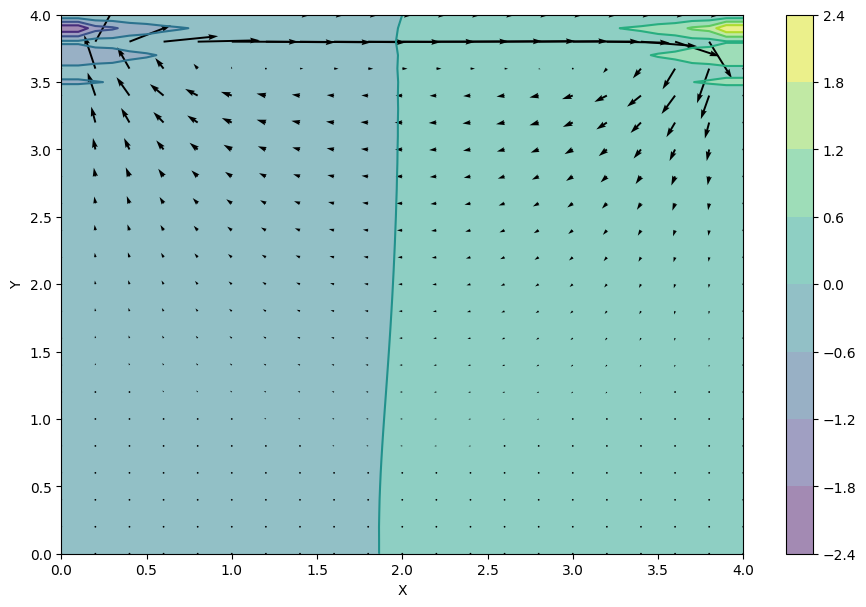

In [5]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 200
u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X,Y,p,alpha=0.5)    ###plnttong the pressure field as a contour
plt.colorbar()
plt.contour(X,Y,p)               ###plotting the pressure field outlines
plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) ##plotting velocity
plt.xlabel('X')
plt.ylabel('Y')

Se puede ver que dos zonas de presión diferentes se están formando y que la forma de espiral que se espera se está empezando a formar en este problema de flujo en una cavidad con tapa en movimiento. Experimenta con diferentes valores de `nt` para ver el tiempo que el sistema tarda en estabilizarse.

Text(0, 0.5, 'Y')

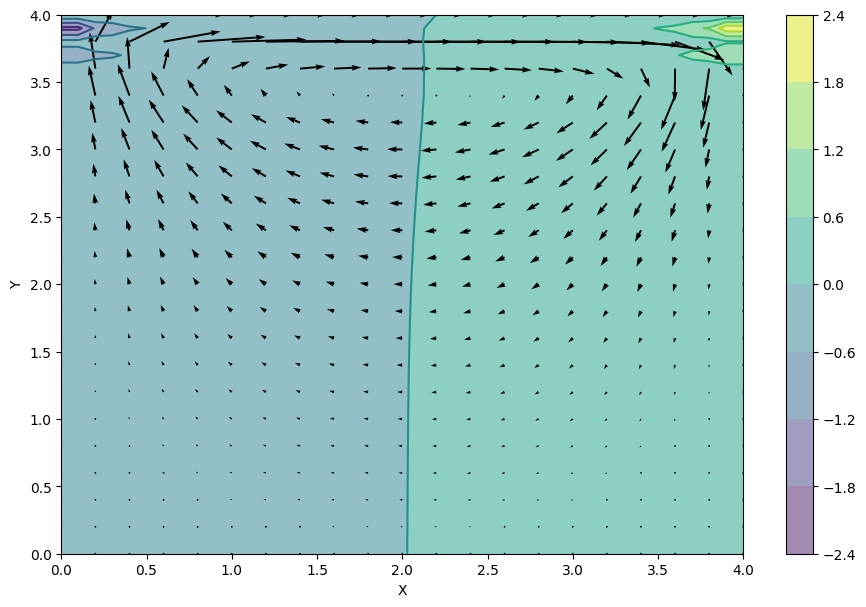

In [6]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 700
u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X,Y,p,alpha=0.5)
plt.colorbar()
plt.contour(X,Y,p)
plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2])
plt.xlabel('X')
plt.ylabel('Y')